In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns


%matplotlib inline

import matplotlib.pyplot as plt

df1 = pd.read_csv("../data/celeba_buffalo_l.csv")
def subset(df):
	mask = df.columns[~df.columns.str.startswith("emb")]
	subset = df[mask]
	subset = subset.drop(columns = ["image_name", "id"])
	return subset

subset1_features = subset(df1)
def subset_emb_columns(df):
    mask = df.columns[df.columns.str.startswith("emb")]
    subset = df[mask]
    return subset

# Example usage
subset_with_emb_columns = subset_emb_columns(df1)

In [2]:
subset_with_emb_columns

embedding_0  embedding_1  embedding_2  embedding_3  embedding_4  \
0         1.441545     2.393396    -1.003623     0.122308     1.842565   
1        -0.513956    -0.054110    -0.041697     1.244457    -0.930742   
2         1.075346     0.380185     0.436007    -0.507009    -0.696099   
3        -1.108241     1.665860     0.904464    -1.106271    -1.015055   
4         0.472541     1.206789     0.675895     0.052689     0.906199   
...            ...          ...          ...          ...          ...   
30007    -1.027609     0.038051     0.678272    -0.681806    -0.403177   
30008    -1.075066     0.667526    -0.520191     0.316831     0.578368   
30009    -0.755745     0.685346    -0.054518     0.747713     0.050222   
30010    -0.876157    -0.433229     0.477012     1.509275    -0.158951   
30011     0.888420     0.647604     1.361924    -0.619118     0.804093   

       embedding_5  embedding_6  embedding_7  embedding_8  embedding_9  ...  \
0        -1.090654     0.968768    -0.160028    -1.140183    -0.803360  ...   
1         0.030254     0.491898     1.462660    -0.067617     0.403593  ...   
2         1.786359    -1.040563    -0.498421    -0.720458    -0.333438  ...   
3         0.256345    -0.403926    -0.500956     1.580117    -0.811156  ...   
4         0.981983     1.308634     1.814266     0.228123    -0.133187  ...   
...            ...          ...          ...          ...          ...  ...   
30007    -0.697944    -0.852238    -0.924309    -0.033749    -1.113889  ...   
30008    -1.846013     0.937127    -0.874951    -1.410228     0.426055  ...   
30009     0.312256     1.024764    -0.069925     0.290415    -0.240367  ...   
30010     0.468560    -0.504834     0.589195    -0.569086    -0.628213  ...   
30011    -1.740126    -0.081146    -0.571754     0.526882     0.388547  ...   

       embedding_502  embedding_503  embedding_504  embedding_505  \
0           0.657348      -1.484989      -0.136410      -1.090225   
1           0.935361      -0.510537       1.625798       0.871837   
2          -1.637391      -0.645637       0.012643      -0.320423   
3           0.939887       0.983840       1.101034       0.255945   
4           0.562390      -0.168269       0.474727       1.060535   
...              ...            ...            ...            ...   
30007       0.687267       0.585606      -1.839872      -1.158070   
30008      -1.628014       0.137390       1.368412       0.890583   
30009       1.086413       0.375387       0.951661      -0.471971   
30010       0.382717      -0.364226       1.077819       0.140129   
30011       1.533035       2.632154      -0.731286       0.819965   

       embedding_506  embedding_507  embedding_508  embedding_509  \
0          -1.596338      -0.110376       0.900254       0.341207   
1           2.200004       0.998827      -0.397962       0.390829   
2          -0.697942      -1.986939       1.115830      -1.022141   
3          -0.935750      -1.363179      -0.894348      -0.651322   
4          -0.073372      -0.600600       0.203963       0.013085   
...              ...            ...            ...            ...   
30007      -1.340626       0.191280      -0.838924       1.343969   
30008      -0.214811       1.125041       0.344662       0.062554   
30009      -0.000432      -1.310920       0.981951      -0.705259   
30010      -1.189182       0.159892       0.006826      -1.023947   
30011      -0.483613      -0.469851       0.861013       0.429262   

       embedding_510  embedding_511  
0           0.462908      -0.673743  
1           0.194029       0.992391  
2           0.347849      -0.710683  
3           0.674887      -1.069576  
4           0.170634      -0.035556  
...              ...            ...  
30007       0.039965       0.085690  
30008      -0.456123      -0.207488  
30009      -0.012826      -2.372355  
30010       1.163164       1.535108  
30011       0.556083      -1.118381  

[30012 rows x 512 columns]

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


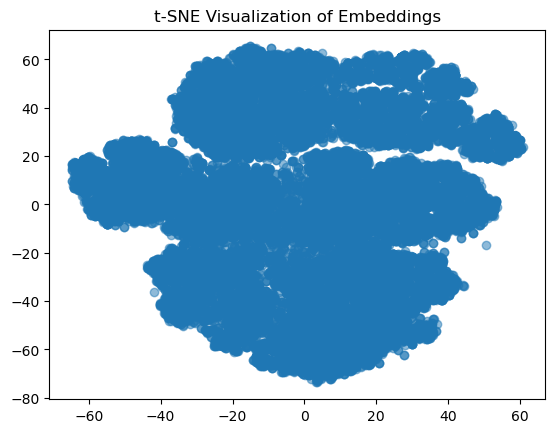

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'embeddings' is your 2D NumPy array with shape (samples, embedding_dimension)
tsne = TSNE(n_components=2, perplexity = 50, random_state=42)
embeddings_2d = tsne.fit_transform(subset1_features)

# Scatter plot for visualization
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.5)
plt.title('t-SNE Visualization of Embeddings')
plt.show()

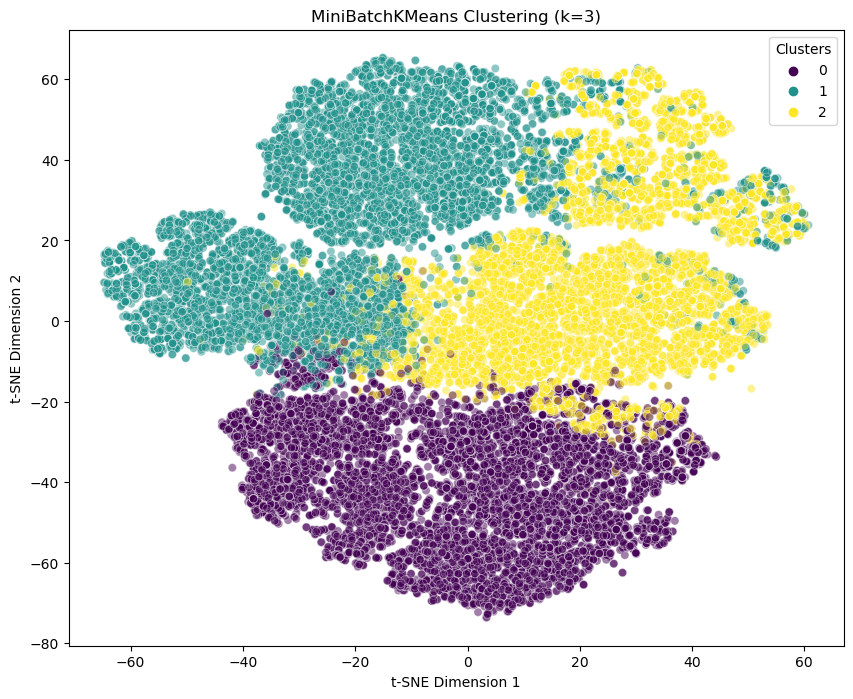

In [11]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'subset1' is your DataFrame and 'embeddings_2d' contains the t-SNE embedding
k = 3

# Apply MiniBatchKMeans clustering
minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
cluster_labels = minibatch_kmeans.fit_predict(subset1_features)

# Visualize the clusters in 2D
plt.figure(figsize=(10, 8))

# Use seaborn for better color mapping
sns.scatterplot(x=embeddings_2d[:, 0], y=embeddings_2d[:, 1], hue=cluster_labels, palette='viridis', alpha=0.5)

plt.title(f'MiniBatchKMeans Clustering (k={k})')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# Add a legend
plt.legend(title='Clusters', loc='upper right')

plt.show()

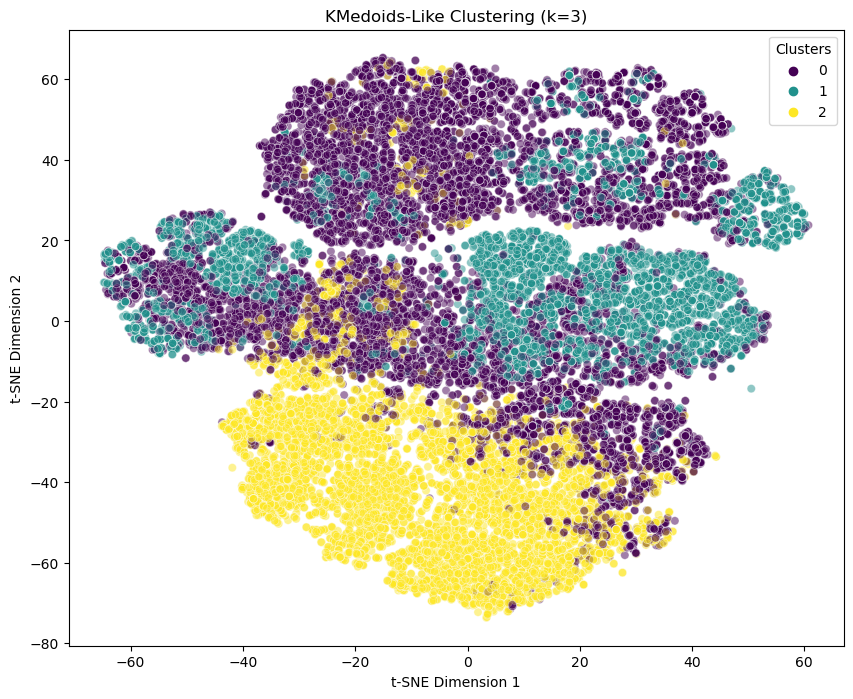

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min, pairwise_distances
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def kmedoids_distance(X, medoids):
    X_reshaped = X.reshape(1, -1) if X.ndim == 1 else X
    return pairwise_distances_argmin_min(X_reshaped, medoids.reshape(1, -1))[1]

# Assuming 'subset1' is your DataFrame and 'embeddings_2d' contains the t-SNE embedding
k = 3

# Calculate pairwise distances
medoids_indices = np.random.choice(len(subset1_features), size=k, replace=False)
medoids = subset1_features.iloc[medoids_indices].values
distances = pairwise_distances(subset1_features.values, medoids, metric=kmedoids_distance)

# Apply KMeans clustering with precomputed distance matrix
kmeans = KMeans(n_clusters=k, random_state=42, n_init=1, init='random')
cluster_labels = kmeans.fit_predict(distances)

# Visualize the clusters in 2D
plt.figure(figsize=(10, 8))

# Use seaborn for better color mapping
sns.scatterplot(x=embeddings_2d[:, 0], y=embeddings_2d[:, 1], hue=cluster_labels, palette='viridis', alpha=0.5)

plt.title(f'KMedoids-Like Clustering (k={k})')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# Add a legend
plt.legend(title='Clusters', loc='upper right')

plt.show()


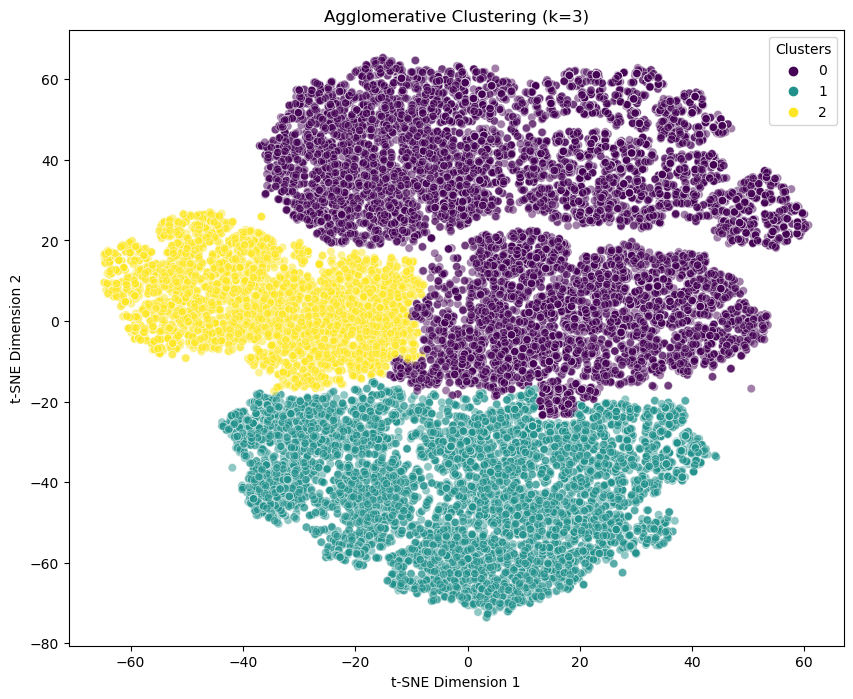

In [13]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'subset1' is your DataFrame and 'embeddings_2d' contains the t-SNE embedding
n_clusters = 3

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = agg_clustering.fit_predict(embeddings_2d)  # Assuming embeddings_2d contains your t-SNE embedding

# Visualize the clusters in 2D
plt.figure(figsize=(10, 8))

# Use seaborn for better color mapping
sns.scatterplot(x=embeddings_2d[:, 0], y=embeddings_2d[:, 1], hue=cluster_labels, palette='viridis', alpha=0.5)

plt.title(f'Agglomerative Clustering (k={n_clusters})')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# Add a legend
plt.legend(title='Clusters', loc='upper right')

plt.show()


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


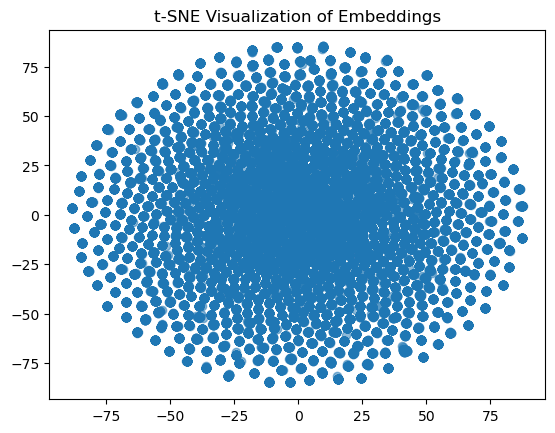

In [14]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'embeddings' is your 2D NumPy array with shape (samples, embedding_dimension)
tsne = TSNE(n_components=2, perplexity = 50, random_state=42)
embeddings_2d = tsne.fit_transform(subset_with_emb_columns)

# Scatter plot for visualization
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.5)
plt.title('t-SNE Visualization of Embeddings')
plt.show()

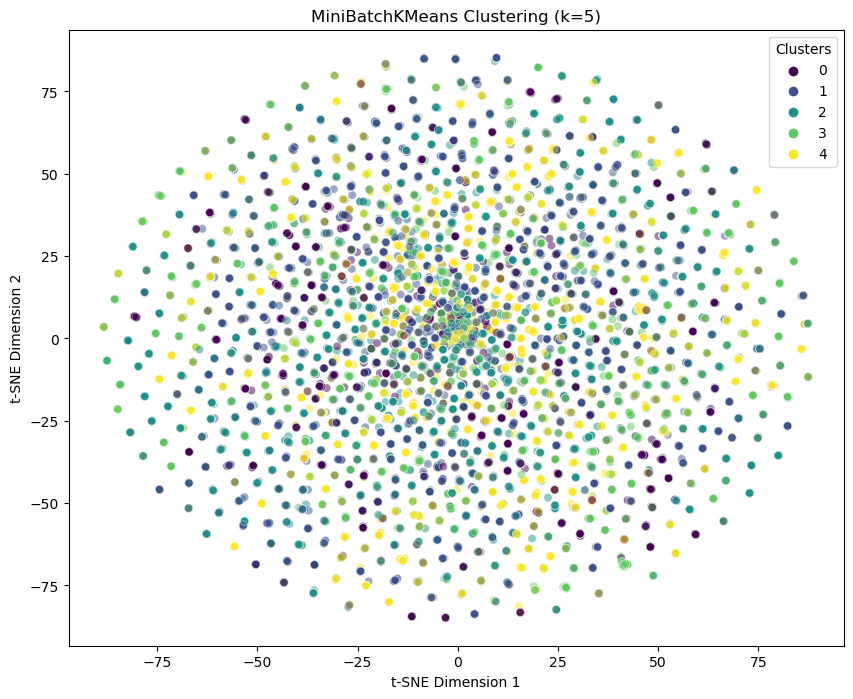

In [19]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'subset1' is your DataFrame and 'embeddings_2d' contains the t-SNE embedding
k = 5

# Apply MiniBatchKMeans clustering
minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
cluster_labels = minibatch_kmeans.fit_predict(subset_with_emb_columns)

# Visualize the clusters in 2D
plt.figure(figsize=(10, 8))

# Use seaborn for better color mapping
sns.scatterplot(x=embeddings_2d[:, 0], y=embeddings_2d[:, 1], hue=cluster_labels, palette='viridis', alpha=0.5)

plt.title(f'MiniBatchKMeans Clustering (k={k})')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# Add a legend
plt.legend(title='Clusters', loc='upper right')

plt.show()

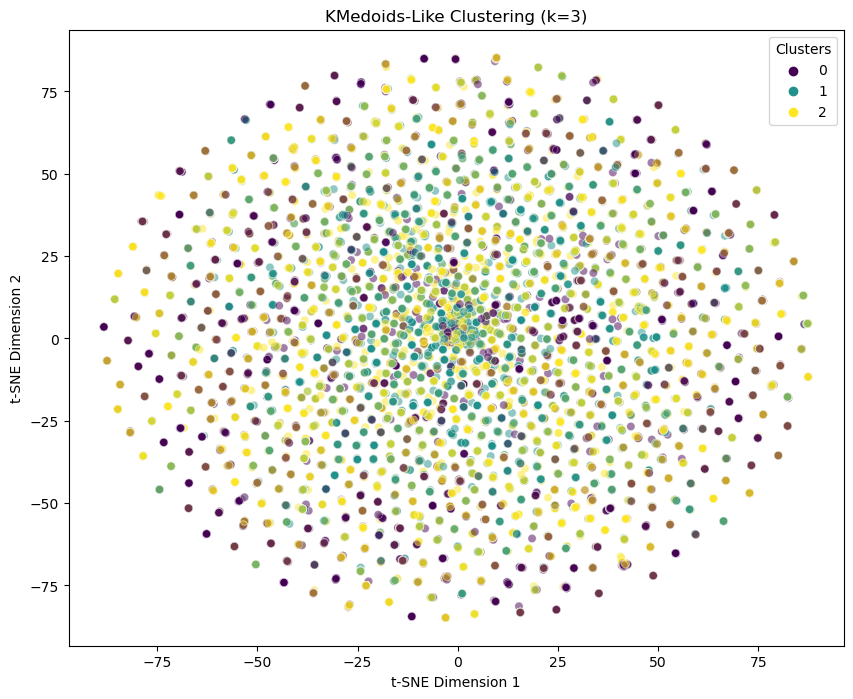

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min, pairwise_distances
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def kmedoids_distance(X, medoids):
    X_reshaped = X.reshape(1, -1) if X.ndim == 1 else X
    return pairwise_distances_argmin_min(X_reshaped, medoids.reshape(1, -1))[1]

# Assuming 'subset1' is your DataFrame and 'embeddings_2d' contains the t-SNE embedding
k = 3

# Calculate pairwise distances
medoids_indices = np.random.choice(len(subset_with_emb_columns), size=k, replace=False)
medoids = subset_with_emb_columns.iloc[medoids_indices].values
distances = pairwise_distances(subset_with_emb_columns.values, medoids, metric=kmedoids_distance)

# Apply KMeans clustering with precomputed distance matrix
kmeans = KMeans(n_clusters=k, random_state=42, n_init=1, init='random')
cluster_labels = kmeans.fit_predict(distances)

# Visualize the clusters in 2D
plt.figure(figsize=(10, 8))

# Use seaborn for better color mapping
sns.scatterplot(x=embeddings_2d[:, 0], y=embeddings_2d[:, 1], hue=cluster_labels, palette='viridis', alpha=0.5)

plt.title(f'KMedoids-Like Clustering (k={k})')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# Add a legend
plt.legend(title='Clusters', loc='upper right')

plt.show()



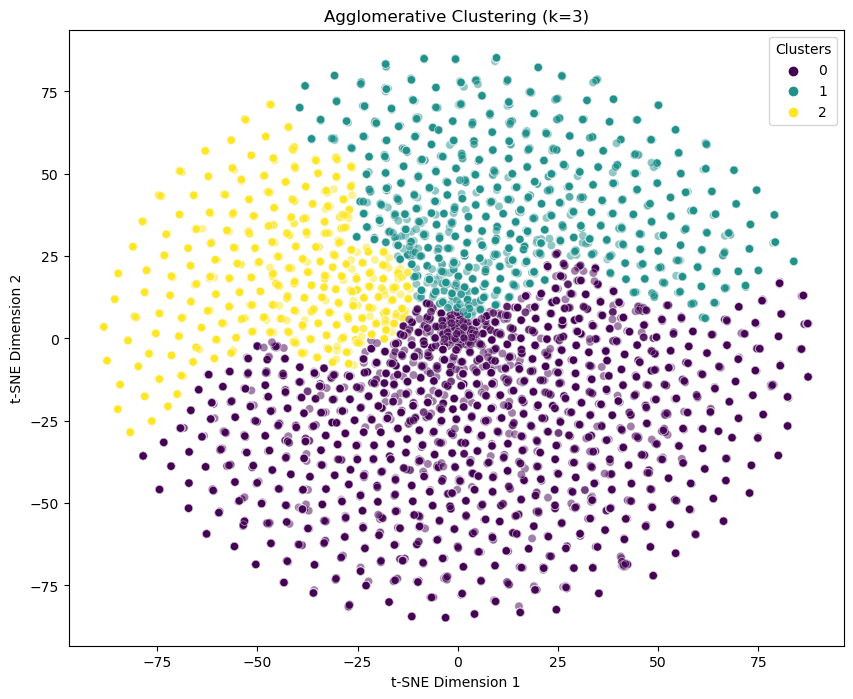

In [23]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'subset1' is your DataFrame and 'embeddings_2d' contains the t-SNE embedding
n_clusters = 3

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = agg_clustering.fit_predict(embeddings_2d)  # Assuming embeddings_2d contains your t-SNE embedding

# Visualize the clusters in 2D
plt.figure(figsize=(10, 8))

# Use seaborn for better color mapping
sns.scatterplot(x=embeddings_2d[:, 0], y=embeddings_2d[:, 1], hue=cluster_labels, palette='viridis', alpha=0.5)

plt.title(f'Agglomerative Clustering (k={n_clusters})')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# Add a legend
plt.legend(title='Clusters', loc='upper right')

plt.show()
